# <u> AIML Module Project-2 Submission  </u>

In [114]:
# Importing all the required libraries for the project
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import chi2_contingency,f_oneway
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

## PART ONE : PROJECT BASED [Total Score : 30]

### DOMAIN: Healthcare
### CONTEXT: 
Medical research university X is undergoing a deep research on patients with certain conditions.
University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by
the client by providing different datasets to the AI team for developing a AIML model which can predict the
condition of the patient depending on the received test results.
#### DATA DESCRIPTION: 
The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.
1. P_incidence
2. P_tilt
3. L_angle
4. S_slope
5. P_radius
6. S_degree
7. Class

### 1. Import and warehouse data:
* Import all the given datasets and explore shape and size of each.
* Merge all datasets onto one and explore final shape and size.

In [115]:
# Importing data from local
normal_data = pd.read_csv("C:/Users/INANNAR/Desktop/ABB/My Learnings/GreatLearning AIML/Project 2/Part1 - Normal.csv")
type_h_data = pd.read_csv("C:/Users/INANNAR/Desktop/ABB/My Learnings/GreatLearning AIML/Project 2/Part1 - Type_H.csv")
type_s_data = pd.read_csv("C:/Users/INANNAR/Desktop/ABB/My Learnings/GreatLearning AIML/Project 2/Part1 - Type_S.csv")

In [116]:
# Shape of the three datasets
print("Size of normal data:",normal_data.shape)
print("Size of type h data:",type_h_data.shape)
print("Size of type s data:",type_s_data.shape)

Size of normal data: (100, 7)
Size of type h data: (60, 7)
Size of type s data: (150, 7)


In [117]:
# Column details and type for each volumn
print("Normal Data - Column details")
normal_data.info()
print("====================================================")
print("Type H Data - Column details")
type_h_data.info()
print("====================================================")
print("Type S Data - Column details")
type_s_data.info()

Normal Data - Column details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB
Type H Data - Column details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree

### Comment:
" Since there are no null values, the number of columns are same, the datatypes and column names are same, it is safe to merge the three datasets" 

In [118]:
# Appending the three datasets
med_data = normal_data.append([type_h_data, type_s_data])
med_data.shape

(310, 7)

In [119]:
med_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


### 2. Data cleansing:
* Explore and if required correct the datatypes of each attribute
* Explore for null values in the attributes and if required drop or impute values.

In [120]:
# Looking into the dataset
med_data.head(10)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
5,30.741938,13.354966,35.903526,17.386972,142.410107,-2.005373,Normal
6,50.913101,6.677000,30.896522,44.236102,118.151531,-1.057986,Normal
7,38.126589,6.557617,50.445075,31.568971,132.114805,6.338199,Normal
8,51.624672,15.969344,35.000000,35.655328,129.385308,1.009228,Nrmal
9,64.311867,26.328369,50.958964,37.983498,106.177751,3.118221,Nrmal


### Comment:
" Columns 0 t0 5 namely - "P_incidence", "P_tilt", "L_angle", "S_slope", "P_radius", "S_Degree" are all measurements are are expected to be float values as they are now.
Also, Class is a categorical variable and is expected to be of the type object.

So, change in data types is not required"

In [121]:
# Checking for Class column for unique categories
med_data["Class"].unique()

array(['Normal', 'Nrmal', 'Type_H', 'type_h', 'Type_S', 'tp_s'],
      dtype=object)

In [122]:
# It can be seen that the 3 expected types are - Normal / Type H / Type S, which are named differently for different dataset
# Fixing this by replacing the entries by common categories
med_data["Class"] = med_data["Class"].replace(["Normal","Nrmal"],'N')
med_data["Class"] = med_data["Class"].replace(["Type_H","type_h"],'T_H')
med_data["Class"] = med_data["Class"].replace(["Type_S","tp_s"],'T_S')
med_data["Class"].unique()

array(['N', 'T_H', 'T_S'], dtype=object)

In [123]:
# Check for null values and requirment for imputation
med_data.isnull().values.any()

False

### Comment:
" Since no null values, there is no need to drop/impute values"

### 3. Data analysis & visualisation:
* Perform detailed statistical analysis on the data.
* Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

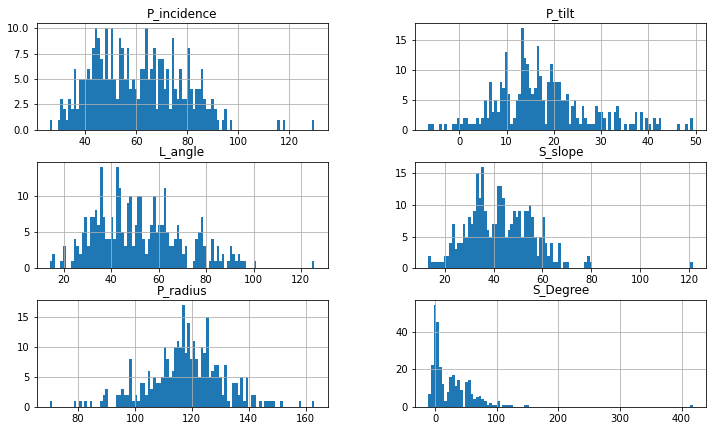

In [124]:
# Histogram of first 6 columns
columns = list(med_data)[0:-1] # Excluding Outcome column which is a category
med_data[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(12,2)); 

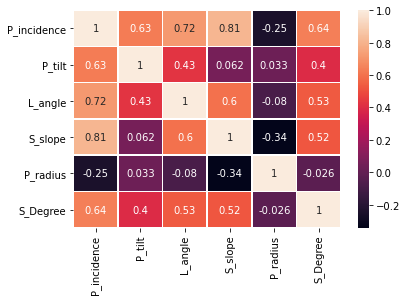

In [125]:
# Getting the correlation matrix 
ax = sns.heatmap(med_data.corr(), annot = True, linewidth=0.5)
plt.show()

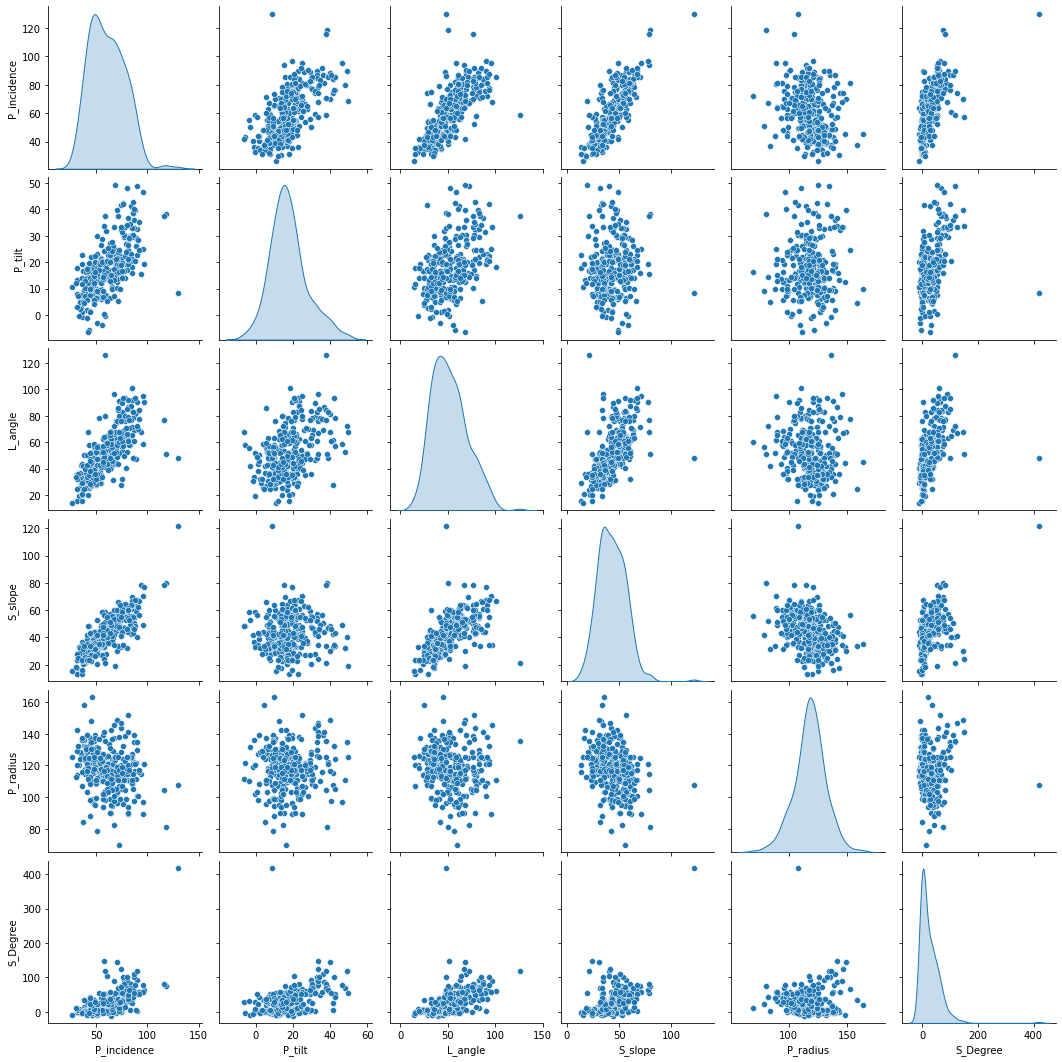

In [126]:
sns.pairplot(med_data,diag_kind='kde')

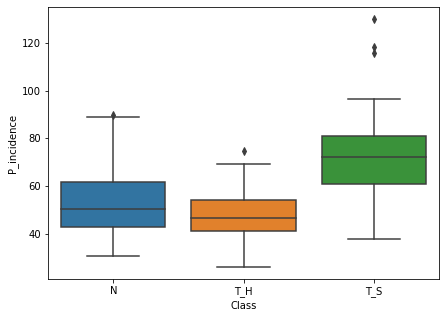

In [127]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(x='Class',y='P_incidence',data=med_data);

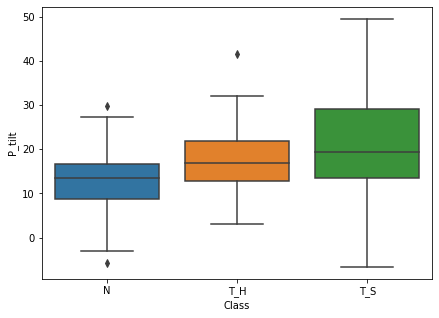

In [128]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(x='Class',y='P_tilt',data=med_data);

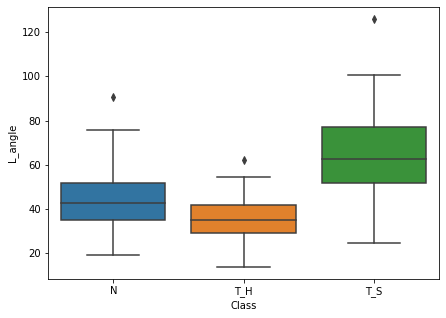

In [129]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(x='Class',y='L_angle',data=med_data);

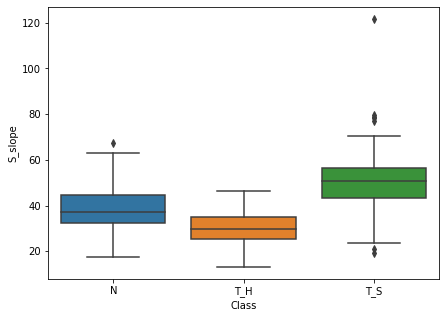

In [130]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(x='Class',y='S_slope',data=med_data);

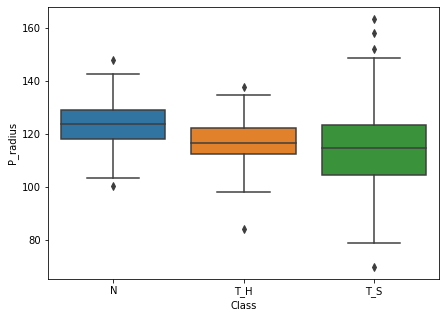

In [131]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(x='Class',y='P_radius',data=med_data);

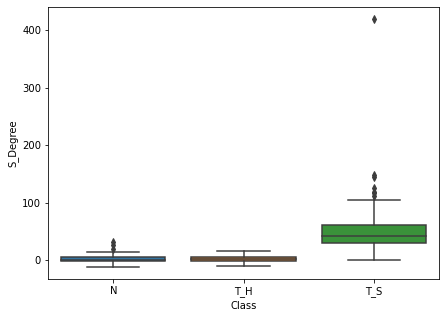

In [132]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(x='Class',y='S_Degree',data=med_data);

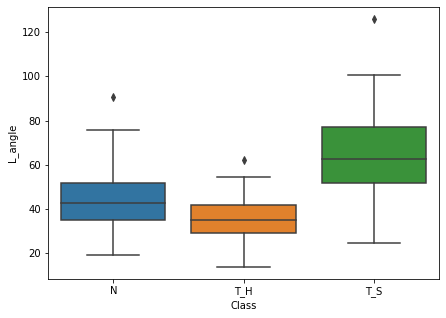

In [133]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(x='Class',y='L_angle',data=med_data);

In [134]:
# Statistical Analysis
med_data.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [135]:
column = med_data.columns[0:-1]

In [136]:
def cont_corr(column):
    CT = med_data.groupby('Class')[column].apply(list)
    Anova_result = f_oneway(*CT)
    print("Null Hypothesis H0: The variables are not correlated with each other.")
    print(f"P value of Anova Test on '{column}'' and 'Class' is {Anova_result[1]:0.6f}")
    if Anova_result[1]>0.05:
        # Null Hypothesis Accepted
        print("Since p-value is greater than 0.05, we accept the Null Hypothesis Ho.")
        print(f"{column} and 'Class are not correlated with each other")
        print("=====================================================================================")
    else:
        # Null Hypothesis Rejected
        print("Since p-value is less than 0.05, we reject the Null Hypothesis Ho.")
        print(f"{column} and 'Class are correlated with each other")
        print("=====================================================================================")

In [137]:
Cont_corr = map(cont_corr,column)
display(list(Cont_corr))

Null Hypothesis H0: The variables are not correlated with each other.
P value of Anova Test on 'P_incidence'' and 'Class' is 0.000000
Since p-value is less than 0.05, we reject the Null Hypothesis Ho.
P_incidence and 'Class are correlated with each other
Null Hypothesis H0: The variables are not correlated with each other.
P value of Anova Test on 'P_tilt'' and 'Class' is 0.000000
Since p-value is less than 0.05, we reject the Null Hypothesis Ho.
P_tilt and 'Class are correlated with each other
Null Hypothesis H0: The variables are not correlated with each other.
P value of Anova Test on 'L_angle'' and 'Class' is 0.000000
Since p-value is less than 0.05, we reject the Null Hypothesis Ho.
L_angle and 'Class are correlated with each other
Null Hypothesis H0: The variables are not correlated with each other.
P value of Anova Test on 'S_slope'' and 'Class' is 0.000000
Since p-value is less than 0.05, we reject the Null Hypothesis Ho.
S_slope and 'Class are correlated with each other
Null H

[None, None, None, None, None, None]

### Comment:

* None of the features are highly skewed
* All the features are correlated to the target variable hence all will be considered for analysis
* Amongst the feature variables, the pairplot and correlation matrix shows that none of the two features are highly correlated, hence no chances of removing any of them.
* For each class (normal/type h/type s) the feature variable distribution is different 

### 4. Data pre-processing:
* Segregate predictors vs target attributes
* Perform normalisation or scaling if required.
* Check for target balancing. Add your comments.
* Perform train-test split.

In [138]:
# Create a separate dataframe consisting only of the features i.e independent attributes

X = med_data.drop(labels= "Class" , axis = 1)
y = med_data["Class"]
X.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910


In [139]:
med_data["Class"].value_counts(normalize=True)

T_S    0.483871
N      0.322581
T_H    0.193548
Name: Class, dtype: float64

In [140]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [141]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(med_data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(med_data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [142]:
print("Original Class as Normal Values    : {0} ({1:0.2f}%)".format(len(med_data.loc[med_data['Class'] == 'N']), (len(med_data.loc[med_data['Class'] == 'N'])/len(med_data.index)) * 100))
print("Original Class as Type H Values   : {0} ({1:0.2f}%)".format(len(med_data.loc[med_data['Class'] == 'T_H']), (len(med_data.loc[med_data['Class'] == 'T_H'])/len(med_data.index)) * 100))
print("Original Class as Type S Values   : {0} ({1:0.2f}%)".format(len(med_data.loc[med_data['Class'] == 'T_S']), (len(med_data.loc[med_data['Class'] == 'T_S'])/len(med_data.index)) * 100))
print("")
print("Training Class as Normal Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 'N']), (len(y_train[y_train[:] == 'N'])/len(y_train)) * 100))
print("Training Class as Type H Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 'T_H']), (len(y_train[y_train[:] == 'T_H'])/len(y_train)) * 100))
print("Training Class as Type S Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 'T_S']), (len(y_train[y_train[:] == 'T_S'])/len(y_train)) * 100))
print("")
print("Test Class as Normal Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 'N']), (len(y_test[y_test[:] == 'N'])/len(y_test)) * 100))
print("Test Class as Type H Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 'T_H']), (len(y_test[y_test[:] == 'T_H'])/len(y_test)) * 100))
print("Test Class as Type S Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 'T_S']), (len(y_test[y_test[:] == 'T_S'])/len(y_test)) * 100))
print("")

Original Class as Normal Values    : 100 (32.26%)
Original Class as Type H Values   : 60 (19.35%)
Original Class as Type S Values   : 150 (48.39%)

Training Class as Normal Values    : 72 (33.18%)
Training Class as Type H Values   : 43 (19.82%)
Training Class as Type S Values   : 102 (47.00%)

Test Class as Normal Values        : 28 (30.11%)
Test Class as Type H Values       : 17 (18.28%)
Test Class as Type S Values       : 48 (51.61%)



#### Comment:
* The data is fairly split for train anmd test

In [143]:
# Using rule of thumb , we start with a k value of sqrt(no. of rows in training)
k = np.sqrt(X_train.shape[0])
k = k.round().astype(int)

### 5. Model training, testing and tuning:
* Design and train a KNN classifier.
* Display the classification accuracies for train and test data.
* Display and explain the classification report in detail.
* Automate the task of finding best values of K for KNN.
* Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model.

### Model Building
* Using the actual data set available after data cleaning

In [144]:
def knn_model(k,X_train,y_train,X_test,y_test):
    NNH = KNeighborsClassifier(n_neighbors= k , weights = 'distance' )
    NNH.fit(X_train, y_train)

    med_train_predict = NNH.predict(X_train)
    print("Train Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, med_train_predict)))
    print()
    med_test_predict = NNH.predict(X_test)
    print("Test Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, med_test_predict)))
    print()
    return med_test_predict

In [145]:
KNN_Model1 = knn_model(k,X_train,y_train,X_test,y_test)

Train Model Accuracy: 1.0000

Test Model Accuracy: 0.8387



Confusion Matrix


<AxesSubplot:>

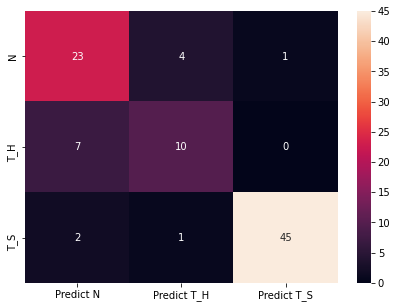

In [146]:
# calculate accuracy measures and confusion matrix
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, KNN_Model1, labels=["N", "T_H", "T_S"])

df_cm = pd.DataFrame(cm, index = [i for i in ["N", "T_H", "T_S"]],
                  columns = [i for i in ["Predict N", "Predict T_H", "Predict T_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [147]:
print("Classification Report")
print(metrics.classification_report(y_test, KNN_Model1, labels=["N", "T_H", "T_S"]))

Classification Report
              precision    recall  f1-score   support

           N       0.72      0.82      0.77        28
         T_H       0.67      0.59      0.62        17
         T_S       0.98      0.94      0.96        48

    accuracy                           0.84        93
   macro avg       0.79      0.78      0.78        93
weighted avg       0.84      0.84      0.84        93



Maximum accuracy:- 0.8709677419354839 at K = 0


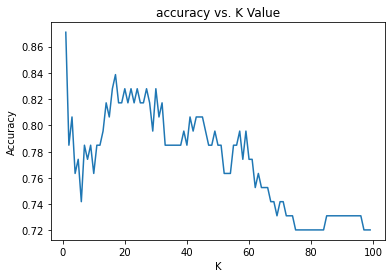

In [148]:
acc = []
for i in range(1,100):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.plot(range(1,100),acc)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Minimum error:- 0.12903225806451613 at K = 0


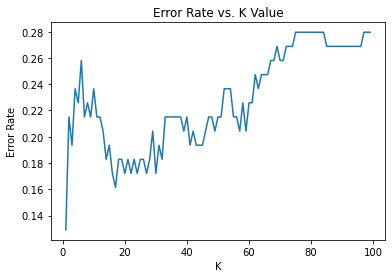

In [149]:
error_rate = []
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.plot(range(1,100),error_rate)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

### Round 2 : Model Building
* Converting the features into z scores as we do not know what units / scales were used and store them in new dataframe

In [150]:
XScaled = X.apply(zscore)

# Split X and y into training and test set in 75:25 ratio

X_train1, X_test1, y_train1, y_test1 = train_test_split(XScaled, y, test_size=0.25, random_state=1)
KNN_Model2 = knn_model(k=k,X_train=X_train1,y_train=y_train1,X_test=X_test1,y_test=y_test1)

Train Model Accuracy: 1.0000

Test Model Accuracy: 0.7436



Confusion Matrix


<AxesSubplot:>

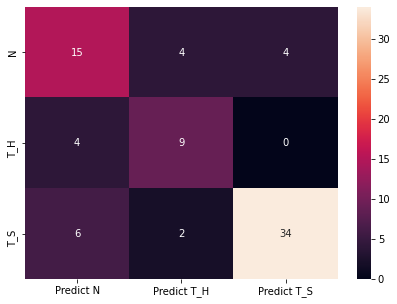

In [151]:
# calculate accuracy measures and confusion matrix
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test1, KNN_Model2, labels=["N", "T_H", "T_S"])

df_cm = pd.DataFrame(cm, index = [i for i in ["N", "T_H", "T_S"]],
                  columns = [i for i in ["Predict N", "Predict T_H", "Predict T_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [152]:
print("Classification Report")
print(metrics.classification_report(y_test1, KNN_Model2, labels=["N", "T_H", "T_S"]))

Classification Report
              precision    recall  f1-score   support

           N       0.60      0.65      0.63        23
         T_H       0.60      0.69      0.64        13
         T_S       0.89      0.81      0.85        42

    accuracy                           0.74        78
   macro avg       0.70      0.72      0.71        78
weighted avg       0.76      0.74      0.75        78



Maximum accuracy:- 0.8205128205128205 at K = 0


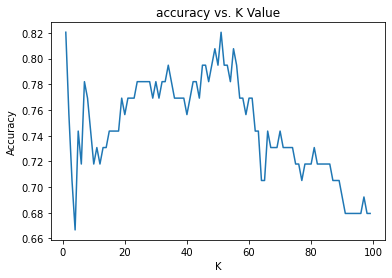

In [153]:
acc1 = []
for i in range(1,100):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train1,y_train1)
    yhat = neigh.predict(X_test1)
    acc1.append(metrics.accuracy_score(y_test1, yhat))

plt.plot(range(1,100),acc1)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc1),"at K =",acc1.index(max(acc1)))

Minimum error:- 0.1794871794871795 at K = 0


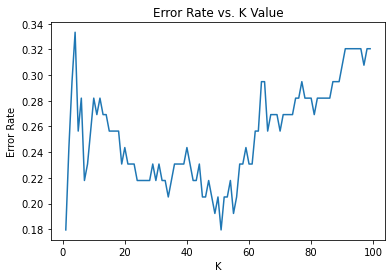

In [154]:
error_rate1 = []
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train1,y_train1)
    pred_i = knn.predict(X_test1)
    error_rate1.append(np.mean(pred_i != y_test1))

plt.plot(range(1,100),error_rate1)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate1),"at K =",error_rate1.index(min(error_rate1)))

### Final Model Building

- k value of around 20 gives maximum accuracy (considering we dont want a high value of k)
- Model 1 is better as the acurracy and error rate both are better comapred to Model 2

In [155]:
k = 20

In [156]:
KNN_Model3 = knn_model(k, X_train,y_train,X_test,y_test)

Train Model Accuracy: 1.0000

Test Model Accuracy: 0.8495



Confusion Matrix


<AxesSubplot:>

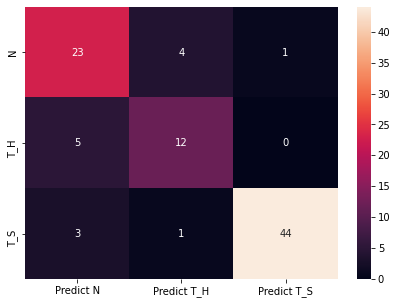

In [157]:
# calculate accuracy measures and confusion matrix
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, KNN_Model3, labels=["N", "T_H", "T_S"])

df_cm = pd.DataFrame(cm, index = [i for i in ["N", "T_H", "T_S"]],
                  columns = [i for i in ["Predict N", "Predict T_H", "Predict T_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [158]:
print("Classification Report")
print(metrics.classification_report(y_test, KNN_Model3, labels=["N", "T_H", "T_S"]))

Classification Report
              precision    recall  f1-score   support

           N       0.74      0.82      0.78        28
         T_H       0.71      0.71      0.71        17
         T_S       0.98      0.92      0.95        48

    accuracy                           0.85        93
   macro avg       0.81      0.81      0.81        93
weighted avg       0.86      0.85      0.85        93



### 6. Conclusion and improvisation:
* Write your conclusion on the results.
* Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the research team to perform a better data analysis in future.

- Model :
    - Model fits better for the original data set without any transformation
    - The optimum value of k is close to the value of k obtained by rule of thumb
    - Precision and Recall for each class is good enough
- Dataset :
    - Providing the units of measurements might help if any transformations are required
    - Additional data about the patients health/history will add value to model building
    - The size of the data set is small, more data points will surely add value for better model building and prediction

### DOMAIN: Banking and finance
### CONTEXT: 
A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee
majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the
borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an
average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing
department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit
with same budget as per last campaign.
### DATA DESCRIPTION: The data consists of the following attributes:
1. ID: Customer ID
2. Age Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card.

### 1. Import and warehouse data:
* Import all the given datasets and explore shape and size of each.
* Merge all datasets onto one and explore final shape and size.

In [159]:
# Importing data from local
Data1 = pd.read_csv("C:/Users/INANNAR/Desktop/ABB/My Learnings/GreatLearning AIML/Project 2/Part2 - Data1.csv")
Data2 = pd.read_csv("C:/Users/INANNAR/Desktop/ABB/My Learnings/GreatLearning AIML/Project 2/Part2 -Data2.csv")

In [160]:
# Shape of the three datasets
print("Size of data1:",Data1.shape)
print("Size of data2:",Data2.shape)

Size of data1: (5000, 8)
Size of data2: (5000, 7)


In [161]:
# Column details and type for each volumn
print("Data1 - Column details")
Data1.info()
print("====================================================")
print("Data2 - Column details")
Data2.info()

Data1 - Column details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB
Data2 - Column details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null 

In [162]:
# Merging the two datasets based onm the common column "ID"
Data = pd.merge(Data1, Data2, on='ID')
Data = Data.set_index("ID")
Data.shape

(5000, 13)

In [163]:
Data.head()

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [164]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   CustomerSince        5000 non-null   int64  
 2   HighestSpend         5000 non-null   int64  
 3   ZipCode              5000 non-null   int64  
 4   HiddenScore          5000 non-null   int64  
 5   MonthlyAverageSpend  5000 non-null   float64
 6   Level                5000 non-null   int64  
 7   Mortgage             5000 non-null   int64  
 8   Security             5000 non-null   int64  
 9   FixedDepositAccount  5000 non-null   int64  
 10  InternetBanking      5000 non-null   int64  
 11  CreditCard           5000 non-null   int64  
 12  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 546.9 KB


### 2. Data cleansing:
* Explore and if required correct the datatypes of each attribute
* Explore for null values in the attributes and if required drop or impute values.

### 3. Data analysis & visualisation:
* Perform detailed statistical analysis on the data.
* Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

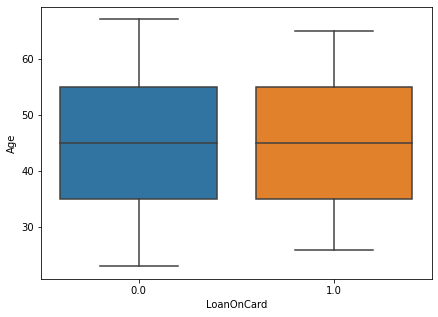

In [165]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(x='LoanOnCard',y='Age',data=Data);

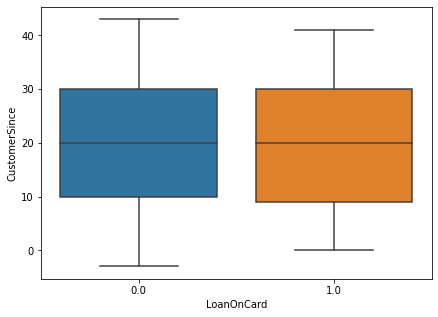

In [166]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(x='LoanOnCard',y='CustomerSince',data=Data);

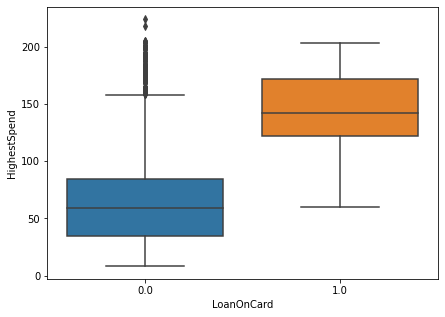

In [167]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(x='LoanOnCard',y='HighestSpend',data=Data);         

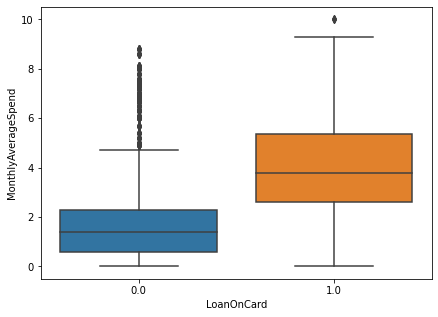

In [168]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(x='LoanOnCard',y='MonthlyAverageSpend',data=Data);

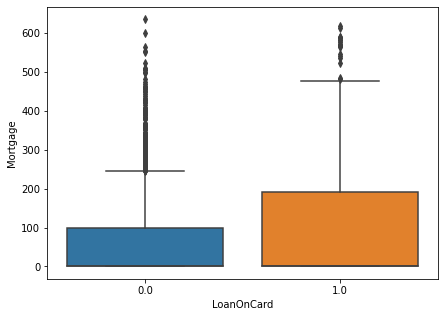

In [169]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(x='LoanOnCard',y='Mortgage',data=Data);

In [170]:
# Separating categorical and continuous features
Data_Cat = Data[["ZipCode","HiddenScore","Level","FixedDepositAccount","Security","InternetBanking","CreditCard"]]
Data_Cont = Data[["Age","CustomerSince","HighestSpend","MonthlyAverageSpend","Mortgage"]]

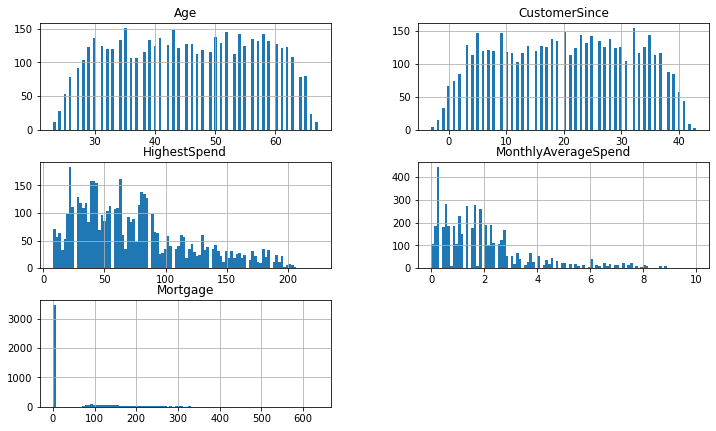

In [171]:
# Histogram of first continuous
columns = list(Data_Cont)[:]
Data_Cont[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(12,2)); 

In [172]:
cat_columns = Data_Cat.columns
cont_columns = Data_Cont.columns

In [173]:
def cat_corr(column):
    CT = pd.crosstab(index = Data[column], columns = Data['LoanOnCard'])
    Chi2 = chi2_contingency(CT)
    print(f"P value of Chi Square Test on '{column}'' and 'LoanOnCard' is {Chi2[1]:0.6f}")
    if Chi2[1]>0.05:
        # Null Hypothesis Accepted
        print("Since p-value is greater than 0.05, we accept the Null Hypothesis Ho.")
        print(f"{column} and 'LoanOnCard are not correlated with each other")
        print("=====================================================================================")
    else:
        # Null Hypothesis Rejected
        print("Since p-value is less than 0.05, we reject the Null Hypothesis Ho.")
        print(f"{column} and 'LoanOnCard are correlated with each other")
        print("=====================================================================================")

In [174]:
Cat_Corr = map(cat_corr,cat_columns)
print(list(Cat_Corr))

P value of Chi Square Test on 'ZipCode'' and 'LoanOnCard' is 0.777973
Since p-value is greater than 0.05, we accept the Null Hypothesis Ho.
ZipCode and 'LoanOnCard are not correlated with each other
P value of Chi Square Test on 'HiddenScore'' and 'LoanOnCard' is 0.000002
Since p-value is less than 0.05, we reject the Null Hypothesis Ho.
HiddenScore and 'LoanOnCard are correlated with each other
P value of Chi Square Test on 'Level'' and 'LoanOnCard' is 0.000000
Since p-value is less than 0.05, we reject the Null Hypothesis Ho.
Level and 'LoanOnCard are correlated with each other
P value of Chi Square Test on 'FixedDepositAccount'' and 'LoanOnCard' is 0.000000
Since p-value is less than 0.05, we reject the Null Hypothesis Ho.
FixedDepositAccount and 'LoanOnCard are correlated with each other
P value of Chi Square Test on 'Security'' and 'LoanOnCard' is 0.140819
Since p-value is greater than 0.05, we accept the Null Hypothesis Ho.
Security and 'LoanOnCard are not correlated with each ot

In [175]:
def cont_corr(column):
    CT = Data.groupby('LoanOnCard')[column].apply(list)
    Anova_result = f_oneway(*CT)
    print("Null Hypothesis H0: The variables are not correlated with each other.")
    print(f"P value of Anova Test on '{column}'' and 'LoanOnCard' is {Anova_result[1]:0.6f}")
    if Anova_result[1]>0.05:
        # Null Hypothesis Accepted
        print("Since p-value is greater than 0.05, we accept the Null Hypothesis Ho.")
        print(f"{column} and 'LoanOnCard are not correlated with each other")
        print("=====================================================================================")
    else:
        # Null Hypothesis Rejected
        print("Since p-value is less than 0.05, we reject the Null Hypothesis Ho.")
        print(f"{column} and 'LoanOnCard are correlated with each other")
        print("=====================================================================================")

In [176]:
Cont_Corr = map(cont_corr,cont_columns)
print(list(Cont_Corr))

Null Hypothesis H0: The variables are not correlated with each other.
P value of Anova Test on 'Age'' and 'LoanOnCard' is 0.565435
Since p-value is greater than 0.05, we accept the Null Hypothesis Ho.
Age and 'LoanOnCard are not correlated with each other
Null Hypothesis H0: The variables are not correlated with each other.
P value of Anova Test on 'CustomerSince'' and 'LoanOnCard' is 0.582043
Since p-value is greater than 0.05, we accept the Null Hypothesis Ho.
CustomerSince and 'LoanOnCard are not correlated with each other
Null Hypothesis H0: The variables are not correlated with each other.
P value of Anova Test on 'HighestSpend'' and 'LoanOnCard' is 0.000000
Since p-value is less than 0.05, we reject the Null Hypothesis Ho.
HighestSpend and 'LoanOnCard are correlated with each other
Null Hypothesis H0: The variables are not correlated with each other.
P value of Anova Test on 'MonthlyAverageSpend'' and 'LoanOnCard' is 0.000000
Since p-value is less than 0.05, we reject the Null Hy

### Comments:
- From the categorical features versus categorical target variable correlation test by Chi-Square method:
    - We select the features which are correlated.
    - We drop the features which are not correlated from the analysis
    - Selected features : 'HiddenScore','Level','FixedDepositAccount'
    - Dropped features : 'ZipCode','InternetBanking','CreditCard','Security'
 
- From the continuous features versus categorical target variable correlation test by ANOVA method:
    - We select the features which are correlated.
    - We drop the features which are not correlated from the analysis.
    - Selected features : 'HighestSpend','MonthlyAverageSpend','Mortgage'
    - Dropped features : 'Age','CustomerSince'

In [177]:
Data_new = Data[['HiddenScore','Level','FixedDepositAccount','HighestSpend','MonthlyAverageSpend','Mortgage','LoanOnCard']]

In [178]:
# Check for null values and requirment for imputation
Data_new.isnull().values.any()

True

In [179]:
Data1 = Data_new.copy()
Data1 = Data1.dropna()
Data1.isnull().values.any()

False

### 4. Data pre-processing:
* Segregate predictors vs target attributes
* Check for target balancing and fix it if found imbalanced.
* Perform train-test split.

In [180]:
X = Data1.drop('LoanOnCard',axis=1)    
Y = Data1['LoanOnCard']   
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
x_train.head()

,HiddenScore,Level,FixedDepositAccount,HighestSpend,MonthlyAverageSpend,Mortgage
ID,,,,,,
1480,1,3,0,43,1.0,102
1728,2,2,0,54,1.5,0
2844,4,1,0,20,1.0,134
4107,1,2,0,54,1.2,0
1769,4,1,0,128,5.3,84


In [181]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(Data_new.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(Data_new.index)) * 100))

69.72% data is in training set
29.88% data is in test set


In [182]:
print("Original Loan True Values    : {0} ({1:0.2f}%)".format(len(Data_new.loc[Data_new['LoanOnCard'] == 1]), (len(Data_new.loc[Data_new['LoanOnCard'] == 1])/len(Data_new.index)) * 100))
print("Original Loan False Values   : {0} ({1:0.2f}%)".format(len(Data_new.loc[Data_new['LoanOnCard'] == 0]), (len(Data_new.loc[Data_new['LoanOnCard'] == 0])/len(Data_new.index)) * 100))
print("")
print("Training Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Loan True Values    : 480 (9.60%)
Original Loan False Values   : 4500 (90.00%)

Training Loan True Values    : 327 (9.38%)
Training Loan False Values   : 3159 (90.62%)

Test Loan True Values        : 153 (10.24%)
Test Loan False Values       : 1341 (89.76%)



### 5. Model training, testing and tuning:
* Design and train a Logistic regression and Naive Bayes classifiers.
* Display the classification accuracies for train and test data.
* Display and explain the classification report in detail.
* Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model.

### Naive Bayes Classifier Modeling on Filtered data
* Data obtained after removing the features with minimum correlation with target

In [183]:
def NBC(x_train,y_train,x_test,y_test):
    # using Gaussian algorithm from Naive Bayes
    loan_model = GaussianNB()
    loan_model.fit(x_train, y_train.ravel())

    loan_train_predict = loan_model.predict(x_train)
    print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, loan_train_predict)))
    print()
    loan_test_predict = loan_model.predict(x_test)
    print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, loan_test_predict)))
    print()
    return loan_test_predict

In [184]:
Model1 = NBC(x_train = x_train,y_train = y_train,x_test = x_test,y_test=y_test)

Model Accuracy: 0.8881

Model Accuracy: 0.8822



Confusion Matrix


<AxesSubplot:>

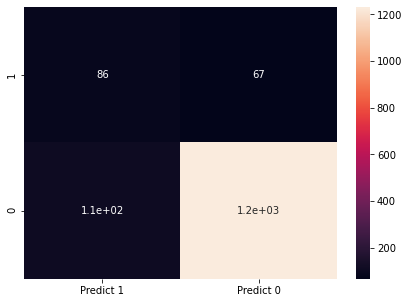

In [185]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, Model1, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [186]:
print("Classification Report")
print(metrics.classification_report(y_test, Model1, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.44      0.56      0.49       153
           0       0.95      0.92      0.93      1341

    accuracy                           0.88      1494
   macro avg       0.69      0.74      0.71      1494
weighted avg       0.90      0.88      0.89      1494



### Model Building on Original Data

In [187]:
Data2 = Data.dropna()
X1 = Data2.drop('LoanOnCard',axis=1)    
Y1 = Data2['LoanOnCard']   
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.3, random_state=1)
x_train.head()

,HiddenScore,Level,FixedDepositAccount,HighestSpend,MonthlyAverageSpend,Mortgage
ID,,,,,,
1480,1,3,0,43,1.0,102
1728,2,2,0,54,1.5,0
2844,4,1,0,20,1.0,134
4107,1,2,0,54,1.2,0
1769,4,1,0,128,5.3,84


In [188]:
Model2 = NBC(x_train = X_train1,y_train = y_train1,x_test = X_test1,y_test=y_test1)

Model Accuracy: 0.8924

Model Accuracy: 0.8849



Confusion Matrix


<AxesSubplot:>

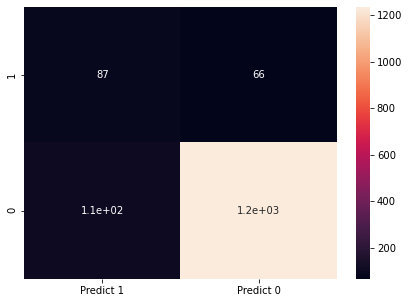

In [189]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, Model2, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [190]:
print("Classification Report")
print(metrics.classification_report(y_test, Model2, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.45      0.57      0.50       153
           0       0.95      0.92      0.93      1341

    accuracy                           0.88      1494
   macro avg       0.70      0.74      0.72      1494
weighted avg       0.90      0.88      0.89      1494



### Comments :
    - The accuracy of the model is not changed drastically by removing the features. Hence it was a good decision.
    - The data split is not uniform which lead to a low recall for the minority class of 1

### Logistic Regression Modeling

In [191]:
def LRM(x_train,x_test,y_train,y_test):
    # Fit the model on train
    loan_model = LogisticRegression(solver="liblinear")
    loan_model.fit(x_train, y_train.ravel())
    loan_train_predict = loan_model.predict(x_train)
    print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, loan_train_predict)))
    print()
    loan_test_predict = loan_model.predict(x_test)
    print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, loan_test_predict)))
    print()
    return loan_test_predict

In [192]:
LRM_Model1 = LRM(x_train,x_test,y_train,y_test)

Model Accuracy: 0.9487

Model Accuracy: 0.9424



<AxesSubplot:>

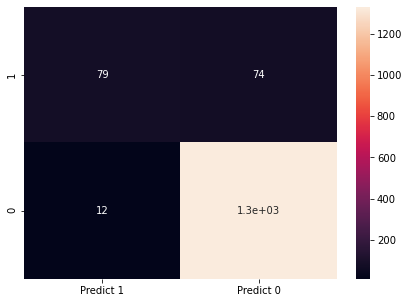

In [193]:
cm=metrics.confusion_matrix(y_test, LRM_Model1, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [194]:
print("Classification Report")
print(metrics.classification_report(y_test, LRM_Model1, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.87      0.52      0.65       153
           0       0.95      0.99      0.97      1341

    accuracy                           0.94      1494
   macro avg       0.91      0.75      0.81      1494
weighted avg       0.94      0.94      0.94      1494



### Comments:
    - Low recall because of the minority class 1 being too less in proportion compared to the majority class
    - Amongst Logistic regression and Naive Bayes, Logistic Regression gives better model for train and test

## Model Tuning
### Balancing the training data ratio of 1 and 0 class using SMOTE resampling

In [195]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 14)
X_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

### Logistic Regression Model after SMOTE

In [196]:
LRM_Model2 = LRM(x_train=X_train_res,x_test=x_test,y_train=y_train_res,y_test=y_test)

Model Accuracy: 0.8742

Model Accuracy: 0.8635



<AxesSubplot:>

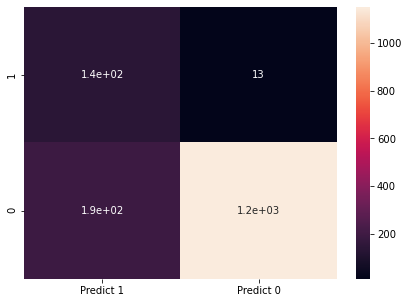

In [197]:
cm=metrics.confusion_matrix(y_test, LRM_Model2, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [198]:
print("Classification Report")
print(metrics.classification_report(y_test, LRM_Model2, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.42      0.92      0.58       153
           0       0.99      0.86      0.92      1341

    accuracy                           0.86      1494
   macro avg       0.71      0.89      0.75      1494
weighted avg       0.93      0.86      0.88      1494



### Naive Bayes Classifier Model after SMOTE

In [199]:
NB_Model2 = NBC(x_train=X_train_res,x_test=x_test,y_train=y_train_res,y_test=y_test)

Model Accuracy: 0.8306

Model Accuracy: 0.8527



<AxesSubplot:>

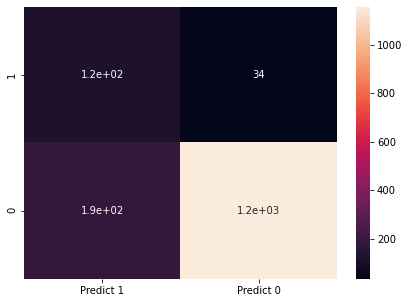

In [200]:
cm=metrics.confusion_matrix(y_test, NB_Model2, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [201]:
print("Classification Report")
print(metrics.classification_report(y_test, NB_Model2, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.39      0.78      0.52       153
           0       0.97      0.86      0.91      1341

    accuracy                           0.85      1494
   macro avg       0.68      0.82      0.72      1494
weighted avg       0.91      0.85      0.87      1494



### 6. Conclusion and improvisation:
* Write your conclusion on the results.
* Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the bank to perform a better data analysis in future.

### Concluding comments:
    - SMOTE does reduce the overall accuracy
    - But the recall of the minority class is improved drastically 
    - So, we can say that this model is better.
    - After SMOTE , out of Naive Bayes and Logistic Regression, again Logistic Regression gives better model

#### Volume : Suggested improvements in the data volume
* The data is quite enough for modelling

#### Velocity : Suggested improvements in the data velocity/frequency of collection
* Data frequency does not play a role here

#### Variety : Suggested improvements in the data variety/type of data sources available
* Details on pattern of spending and transactions with the bank or return of money trends can be included

#### Veracity : Suggested improvements in the data quality
* It is difficult to impute when Nan are in categorical data and hence they had to be dropped. NaN in the data can be reduced/avoided

#### Value : Suggested improvements in the value addition
* The data was highly unequal for the various class, equal amount of data for all the classes is recommended

